## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
model.summary()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.9449 - accuracy: 0.2992 - val_loss: 1.8172 - val_accuracy: 0.3532
Epoch 2/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.7155 - accuracy: 0.3853 - val_loss: 1.6474 - val_accuracy: 0.4104
Epoch 3/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.6308 - accuracy: 0.4180 - val_loss: 1.6069 - val_accuracy: 0.4256
Epoch 4/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.5580 - accuracy: 0.4458 - val_loss: 1.5341 - val_accuracy: 0.4537
Epoch 5/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.5146 - accuracy: 0.4610 - val_loss: 1.5158 - val_accuracy: 0.4584
Epoch 6/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.4727 - accuracy: 0.4751 - val_loss: 1.4837 - val_accuracy: 0.4750
Epoch 7/500
50000/50000 [==============================

50000/50000 [==============================] - 10s 190us/step - loss: 0.5887 - accuracy: 0.7893 - val_loss: 1.9165 - val_accuracy: 0.5139
Epoch 56/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.5765 - accuracy: 0.7936 - val_loss: 1.9026 - val_accuracy: 0.5172
Epoch 57/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.5474 - accuracy: 0.8043 - val_loss: 2.0333 - val_accuracy: 0.5046
Epoch 58/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.5556 - accuracy: 0.8020 - val_loss: 2.0146 - val_accuracy: 0.5130
Epoch 59/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.5262 - accuracy: 0.8114 - val_loss: 2.0640 - val_accuracy: 0.5123
Epoch 60/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.5239 - accuracy: 0.8127 - val_loss: 2.1310 - val_accuracy: 0.4981
Epoch 61/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.5182 - accuracy: 0.8147 - va

50000/50000 [==============================] - 9s 171us/step - loss: 0.2798 - accuracy: 0.8992 - val_loss: 3.5921 - val_accuracy: 0.4948
Epoch 110/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.2593 - accuracy: 0.9073 - val_loss: 3.6039 - val_accuracy: 0.4975
Epoch 111/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.2298 - accuracy: 0.9175 - val_loss: 3.7376 - val_accuracy: 0.4942
Epoch 112/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.2399 - accuracy: 0.9145 - val_loss: 3.7086 - val_accuracy: 0.4941
Epoch 113/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.2365 - accuracy: 0.9147 - val_loss: 3.5981 - val_accuracy: 0.5026
Epoch 114/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.2393 - accuracy: 0.9144 - val_loss: 3.7365 - val_accuracy: 0.4918
Epoch 115/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.2511 - accuracy: 0.9087

50000/50000 [==============================] - 9s 174us/step - loss: 0.1455 - accuracy: 0.9488 - val_loss: 4.8905 - val_accuracy: 0.4901
Epoch 164/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.1481 - accuracy: 0.9475 - val_loss: 4.9840 - val_accuracy: 0.4889
Epoch 165/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.1828 - accuracy: 0.9354 - val_loss: 5.0220 - val_accuracy: 0.4917
Epoch 166/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.1924 - accuracy: 0.9320 - val_loss: 5.0493 - val_accuracy: 0.4927
Epoch 167/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.1806 - accuracy: 0.9379 - val_loss: 5.1010 - val_accuracy: 0.4834
Epoch 168/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.1594 - accuracy: 0.9436 - val_loss: 4.9024 - val_accuracy: 0.4925
Epoch 169/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.1560 - accuracy: 0.9432

50000/50000 [==============================] - 9s 174us/step - loss: 0.1373 - accuracy: 0.9526 - val_loss: 5.7918 - val_accuracy: 0.4875
Epoch 218/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.1580 - accuracy: 0.9459 - val_loss: 5.7439 - val_accuracy: 0.4873
Epoch 219/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.1319 - accuracy: 0.9540 - val_loss: 5.9206 - val_accuracy: 0.4845
Epoch 220/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.1256 - accuracy: 0.9562 - val_loss: 5.9452 - val_accuracy: 0.4821
Epoch 221/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.2085 - accuracy: 0.9318 - val_loss: 5.9259 - val_accuracy: 0.4792
Epoch 222/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.1375 - accuracy: 0.9519 - val_loss: 5.8158 - val_accuracy: 0.4938
Epoch 223/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0943 - accuracy: 0.9666

50000/50000 [==============================] - 9s 176us/step - loss: 0.0633 - accuracy: 0.9786 - val_loss: 6.7537 - val_accuracy: 0.4966
Epoch 272/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 6.6669 - val_accuracy: 0.4893
Epoch 273/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.2419 - accuracy: 0.9262 - val_loss: 6.5337 - val_accuracy: 0.4797
Epoch 274/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.1883 - accuracy: 0.9412 - val_loss: 6.5658 - val_accuracy: 0.4948
Epoch 275/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0874 - accuracy: 0.9705 - val_loss: 6.4295 - val_accuracy: 0.5007
Epoch 276/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.0715 - accuracy: 0.9755 - val_loss: 6.6706 - val_accuracy: 0.4926
Epoch 277/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.1307 - accuracy: 0.9577

50000/50000 [==============================] - 9s 175us/step - loss: 0.1065 - accuracy: 0.9643 - val_loss: 7.0214 - val_accuracy: 0.4921
Epoch 326/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.1097 - accuracy: 0.9628 - val_loss: 6.8763 - val_accuracy: 0.4881
Epoch 327/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.1000 - accuracy: 0.9667 - val_loss: 7.0925 - val_accuracy: 0.4929
Epoch 328/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0580 - accuracy: 0.9805 - val_loss: 7.0612 - val_accuracy: 0.4899
Epoch 329/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0529 - accuracy: 0.9820 - val_loss: 7.1190 - val_accuracy: 0.4863
Epoch 330/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0760 - accuracy: 0.9745 - val_loss: 7.2642 - val_accuracy: 0.4824
Epoch 331/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.2579 - accuracy: 0.9233

50000/50000 [==============================] - 9s 173us/step - loss: 0.0460 - accuracy: 0.9848 - val_loss: 7.4212 - val_accuracy: 0.4885
Epoch 380/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 7.4211 - val_accuracy: 0.4903
Epoch 381/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0096 - accuracy: 0.9981 - val_loss: 7.5574 - val_accuracy: 0.4899
Epoch 382/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0127 - accuracy: 0.9968 - val_loss: 7.5968 - val_accuracy: 0.4970
Epoch 383/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.2182 - accuracy: 0.9420 - val_loss: 7.2047 - val_accuracy: 0.4682
Epoch 384/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.3169 - accuracy: 0.9122 - val_loss: 7.1220 - val_accuracy: 0.4771
Epoch 385/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0739 - accuracy: 0.9758

50000/50000 [==============================] - 9s 173us/step - loss: 0.1124 - accuracy: 0.9635 - val_loss: 7.5874 - val_accuracy: 0.4900
Epoch 434/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.1113 - accuracy: 0.9636 - val_loss: 7.8446 - val_accuracy: 0.4930
Epoch 435/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0812 - accuracy: 0.9733 - val_loss: 7.7247 - val_accuracy: 0.4816
Epoch 436/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0621 - accuracy: 0.9788 - val_loss: 7.6225 - val_accuracy: 0.4874
Epoch 437/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0547 - accuracy: 0.9816 - val_loss: 7.6658 - val_accuracy: 0.4962
Epoch 438/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0642 - accuracy: 0.9790 - val_loss: 7.6541 - val_accuracy: 0.4907
Epoch 439/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.1313 - accuracy: 0.9578

50000/50000 [==============================] - 9s 173us/step - loss: 0.4990 - accuracy: 0.8888 - val_loss: 7.4781 - val_accuracy: 0.4882
Epoch 488/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.1168 - accuracy: 0.9633 - val_loss: 7.5661 - val_accuracy: 0.4860
Epoch 489/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0502 - accuracy: 0.9831 - val_loss: 7.6331 - val_accuracy: 0.4878
Epoch 490/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0154 - accuracy: 0.9959 - val_loss: 7.7515 - val_accuracy: 0.4900
Epoch 491/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 7.9057 - val_accuracy: 0.4932
Epoch 492/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 7.9322 - val_accuracy: 0.4929
Epoch 493/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0028 - accuracy: 0.9999

In [7]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 118

50000/50000 [==============================] - 6s 117us/step - loss: 1.7022 - accuracy: 0.4060 - val_loss: 1.7082 - val_accuracy: 0.4015
Epoch 49/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6989 - accuracy: 0.4060 - val_loss: 1.7010 - val_accuracy: 0.4053
Epoch 50/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6958 - accuracy: 0.4080 - val_loss: 1.6977 - val_accuracy: 0.4068
Epoch 51/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6925 - accuracy: 0.4093 - val_loss: 1.6959 - val_accuracy: 0.4067
Epoch 52/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.6894 - accuracy: 0.4112 - val_loss: 1.6971 - val_accuracy: 0.4072
Epoch 53/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6863 - accuracy: 0.4111 - val_loss: 1.6896 - val_accuracy: 0.4090
Epoch 54/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.6832 - accuracy: 0.4129 - val

Epoch 103/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.5581 - accuracy: 0.4570 - val_loss: 1.5749 - val_accuracy: 0.4503
Epoch 104/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.5562 - accuracy: 0.4591 - val_loss: 1.5747 - val_accuracy: 0.4523
Epoch 105/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.5540 - accuracy: 0.4580 - val_loss: 1.5731 - val_accuracy: 0.4476
Epoch 106/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.5524 - accuracy: 0.4598 - val_loss: 1.5719 - val_accuracy: 0.4507
Epoch 107/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.5498 - accuracy: 0.4607 - val_loss: 1.5687 - val_accuracy: 0.4527
Epoch 108/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.5479 - accuracy: 0.4610 - val_loss: 1.5713 - val_accuracy: 0.4484
Epoch 109/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.5458 - ac

50000/50000 [==============================] - 6s 117us/step - loss: 1.4600 - accuracy: 0.4913 - val_loss: 1.4978 - val_accuracy: 0.4720
Epoch 158/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.4585 - accuracy: 0.4907 - val_loss: 1.4987 - val_accuracy: 0.4719
Epoch 159/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.4566 - accuracy: 0.4935 - val_loss: 1.5061 - val_accuracy: 0.4676
Epoch 160/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.4552 - accuracy: 0.4927 - val_loss: 1.4989 - val_accuracy: 0.4698
Epoch 161/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.4542 - accuracy: 0.4933 - val_loss: 1.4955 - val_accuracy: 0.4743
Epoch 162/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.4517 - accuracy: 0.4939 - val_loss: 1.4943 - val_accuracy: 0.4750
Epoch 163/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.4507 - accuracy: 0.4940

50000/50000 [==============================] - 6s 118us/step - loss: 1.3808 - accuracy: 0.5168 - val_loss: 1.4449 - val_accuracy: 0.4872
Epoch 212/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.3795 - accuracy: 0.5182 - val_loss: 1.4461 - val_accuracy: 0.4903
Epoch 213/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3778 - accuracy: 0.5192 - val_loss: 1.4435 - val_accuracy: 0.4869
Epoch 214/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.3768 - accuracy: 0.5185 - val_loss: 1.4709 - val_accuracy: 0.4771
Epoch 215/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3753 - accuracy: 0.5194 - val_loss: 1.4423 - val_accuracy: 0.4900
Epoch 216/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.3742 - accuracy: 0.5211 - val_loss: 1.4506 - val_accuracy: 0.4892
Epoch 217/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3727 - accuracy: 0.5222

50000/50000 [==============================] - 6s 116us/step - loss: 1.3136 - accuracy: 0.5414 - val_loss: 1.4095 - val_accuracy: 0.4973
Epoch 266/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3121 - accuracy: 0.5418 - val_loss: 1.4634 - val_accuracy: 0.4742
Epoch 267/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.3118 - accuracy: 0.5411 - val_loss: 1.4051 - val_accuracy: 0.5023
Epoch 268/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3096 - accuracy: 0.5423 - val_loss: 1.4284 - val_accuracy: 0.4921
Epoch 269/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.3090 - accuracy: 0.5428 - val_loss: 1.4051 - val_accuracy: 0.5012
Epoch 270/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.3075 - accuracy: 0.5432 - val_loss: 1.4101 - val_accuracy: 0.5011
Epoch 271/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.3061 - accuracy: 0.5453

50000/50000 [==============================] - 6s 115us/step - loss: 1.2528 - accuracy: 0.5625 - val_loss: 1.3808 - val_accuracy: 0.5088
Epoch 320/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.2519 - accuracy: 0.5625 - val_loss: 1.3876 - val_accuracy: 0.5061
Epoch 321/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.2512 - accuracy: 0.5643 - val_loss: 1.3832 - val_accuracy: 0.5075
Epoch 322/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.2498 - accuracy: 0.5641 - val_loss: 1.3887 - val_accuracy: 0.5037
Epoch 323/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.2480 - accuracy: 0.5650 - val_loss: 1.3859 - val_accuracy: 0.5103
Epoch 324/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.2475 - accuracy: 0.5637 - val_loss: 1.3895 - val_accuracy: 0.5086
Epoch 325/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.2465 - accuracy: 0.5647

50000/50000 [==============================] - 6s 116us/step - loss: 1.1967 - accuracy: 0.5830 - val_loss: 1.3681 - val_accuracy: 0.5175
Epoch 374/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1948 - accuracy: 0.5836 - val_loss: 1.3621 - val_accuracy: 0.5196
Epoch 375/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1947 - accuracy: 0.5837 - val_loss: 1.3758 - val_accuracy: 0.5072
Epoch 376/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.1930 - accuracy: 0.5840 - val_loss: 1.3731 - val_accuracy: 0.5161
Epoch 377/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.1927 - accuracy: 0.5825 - val_loss: 1.3647 - val_accuracy: 0.5169
Epoch 378/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.1912 - accuracy: 0.5842 - val_loss: 1.3679 - val_accuracy: 0.5128
Epoch 379/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.1908 - accuracy: 0.5845

50000/50000 [==============================] - 6s 116us/step - loss: 1.1412 - accuracy: 0.6026 - val_loss: 1.3616 - val_accuracy: 0.5137
Epoch 428/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1417 - accuracy: 0.6007 - val_loss: 1.3511 - val_accuracy: 0.5221
Epoch 429/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.1394 - accuracy: 0.6032 - val_loss: 1.3488 - val_accuracy: 0.5269
Epoch 430/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.1391 - accuracy: 0.6023 - val_loss: 1.3628 - val_accuracy: 0.5140
Epoch 431/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1389 - accuracy: 0.6022 - val_loss: 1.3623 - val_accuracy: 0.5207
Epoch 432/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1358 - accuracy: 0.6035 - val_loss: 1.3416 - val_accuracy: 0.5267
Epoch 433/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1375 - accuracy: 0.6041

50000/50000 [==============================] - 6s 116us/step - loss: 1.0891 - accuracy: 0.6209 - val_loss: 1.3819 - val_accuracy: 0.5117
Epoch 482/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.0887 - accuracy: 0.6196 - val_loss: 1.3378 - val_accuracy: 0.5264
Epoch 483/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0877 - accuracy: 0.6203 - val_loss: 1.3602 - val_accuracy: 0.5209
Epoch 484/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0863 - accuracy: 0.6214 - val_loss: 1.4425 - val_accuracy: 0.5048
Epoch 485/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0860 - accuracy: 0.6202 - val_loss: 1.3510 - val_accuracy: 0.5242
Epoch 486/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.0833 - accuracy: 0.6233 - val_loss: 1.3746 - val_accuracy: 0.5170
Epoch 487/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.0822 - accuracy: 0.6232

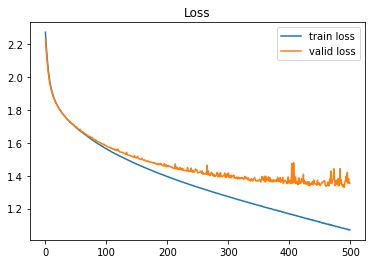

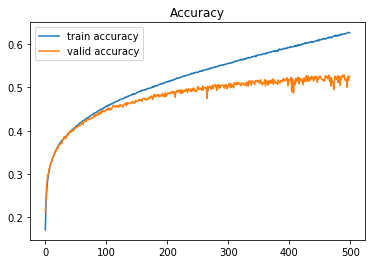

In [8]:
model = build_mlp()
model.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()